## Minimum Varaince Portfolio Problem with Unknown $\mu$ and $\Sigma$
---

In practice, we do not know the true $\mu$ or $\Sigma$. So we need to estimate them with data.

Let $r_{nt}$ denote realized return on asset $n$ at period $t$  $(t=1,\dots,T)$. The sample mean $\bar r_n$ and the sample covariance $s_{nm}$ (or the sample variance $s_n^2$ when $n=m$) are defined as

\begin{align*}
 \bar r_n &= \frac1T\sum_{t=1}^T r_{it},\\
 s_{nm} &= \frac1T\sum_{t=1}^T(r_{nt}-\bar r_n)(r_{mt}-\bar r_m),\\
 & (n,m = 1,\dots,N).
\end{align*}

A straightforward way is to replace $\mu$ and $\Sigma$ with

\begin{equation*}
 \bar r = \begin{bmatrix} \bar r_1 \\ \vdots \\ \bar r_N \end{bmatrix},
 \quad
 S =
 \begin{bmatrix}
  s_1^2 &\cdots & s_{1N} \\
  \vdots & \ddots & \vdots \\
  s_{N1} &\cdots & s_N^2 \\
 \end{bmatrix}.
\end{equation*}

A more elegant way is to rewrite the sample variance $w^{\intercal}Sw$ as

\begin{align*}
 w^{\intercal}Sw &= \sum_{n=1}^N\sum_{m=1}^N w_n w_m s_{nm} \\
 &= \sum_{n=1}^N\sum_{m=1}^N w_n w_m
 \left\{\frac1T\sum_{t=1}^T(r_{nt}-\bar r_n)(r_{mt}-\bar r_m)\right\}  \\
 &= \frac1T\sum_{t=1}^T\sum_{n=1}^N w_n(r_{nt}-\bar r_n)\sum_{m=1}^N w_n(r_{nt}-\bar r_n) \\
 &= \frac1T\sum_{t=1}^T\left\{\sum_{n=1}^N w_n(r_{nt}-\bar r_n)\right\}^2 
 = \frac1T\sum_{t=1}^T\left(r_{Pt}-\bar r_P\right)^2, \\
\end{align*}

where

\begin{equation*}
 r_{Pt} = \sum_{n=1}^N w_n r_{nt}, \quad
 \bar r_P = \sum_{n=1}^N w_n \bar r_n = \frac1T\sum_{t=1}^T r_{Pt}.
\end{equation*}

Then the minimum variance portfolio problem is rearranged as 

\begin{align*}
 \min_{w,v} & \quad \widehat{\mathrm{Var}}[R_P] = \frac1Tv^{\intercal}v, \\
 \mbox{s.t.} & \quad Dw = v, 
 			   \quad w^{\intercal}\bar r = \mu_P, \quad w^{\intercal}\iota = 1, \\
             & \quad w_1\geqq 0,\ \cdots,\ w_N\geqq 0,
\end{align*}

where

\begin{equation*}
 v = \begin{bmatrix} v_1\\ \vdots\\ v_T\end{bmatrix},\quad
 D = \begin{bmatrix}
 r_{11}-\bar r_1 & \cdots & r_{N1}-\bar r_N \\
 \vdots & \ddots & \vdots \\
 r_{1T}-\bar r_1 & \cdots & r_{NT}-\bar r_N
 \end{bmatrix}.
\end{equation*}


In [1]:
import numpy as np
import cvxpy as cp
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

`read_csv` loads data from a CSV file into a Pandas dataframe. The option `index_col=0` means that the first column (the index starts at zero in Python) of the CSV file is used as the index of the dataframe.

See more details on `read_csv` at https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

In [2]:
marketcap = pd.read_csv('stock_market_cap.csv', index_col=0)
display(marketcap)

,Asset1,Asset2,Asset3,Asset4,Asset5
2014/01,4042467030160,1721278350000,3636185014266,523300716675,1417937011300
2014/02,3717881642800,1778654295000,3380003281179,534459766750,1388387185800
2014/03,3970867312360,1736861940000,3496127180952,546793453675,1427483878000
2014/04,3369960051120,1521525060000,3573247633473,574397419650,1391569474700
2014/05,3563014105040,1667444130000,3606045986844,581445240750,1541137053000
2014/06,3535434954480,1717736625000,3783334383444,611985798850,1577960681700
2014/07,3649464134680,1632735225000,3839180228373,668368367650,1763897276000
2014/08,3452697502800,1633443570000,3699122395059,700083562600,1840726822300
2014/09,3893433543480,1690111170000,3770924195682,669543004500,1885278866900
2014/10,4281663124440,1687277790000,3794858129223,688337194100,2157591874200


`date_range` creates a series of dates.

+ `periods` - the number of periods
+ `freq` - frequency of dates

See more details on `data_range` at https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.date_range.html


In [3]:
R = (marketcap.diff()/marketcap.shift(1))[1:] * 100
R.index = pd.date_range('2014-2-1', periods=R.shape[0], freq='M')
display(R)

,Asset1,Asset2,Asset3,Asset4,Asset5
2014-02-28,-8.029389,3.333333,-7.045344,2.132435,-2.084001
2014-03-31,6.804565,-2.349661,3.435615,2.307692,2.815979
2014-04-30,-15.132897,-12.398042,2.205882,5.048335,-2.515924
2014-05-31,5.728675,9.590317,0.917886,1.226994,10.748122
2014-06-30,-0.774040,3.016143,4.916421,5.252525,2.389381
2014-07-31,3.225323,-4.948454,1.476101,9.213052,11.783348
2014-08-31,-5.391658,0.043384,-3.648118,4.745167,4.355670
2014-09-30,12.764977,3.469211,1.941050,-4.362416,2.420351
2014-10-31,9.971394,-0.167645,0.634697,2.807018,14.444177
2014-11-30,7.035798,15.533165,3.433777,1.535836,8.849558


In [4]:
T, N = R.shape
Mu = R.mean().values
Sigma = R.cov().values * ((T - 1.0) / T)
Return_Dev = (R - Mu).values / np.sqrt(T)

#### CVXPY version 1.0 (macOS and Linux)

In [5]:
Weight = cp.Variable(N)
Deviation = cp.Variable(T)
Target_Return = cp.Parameter(nonneg=True)
Risk_Variance = cp.sum_squares(Deviation)
Opt_Portfolio = cp.Problem(cp.Minimize(Risk_Variance),
                           [Return_Dev*Weight == Deviation,
                            Weight.T*Mu == Target_Return,
                            cp.sum(Weight) == 1.0,
                            Weight >= 0.0])

#### CVXPY version 0.4 (Windows)

In [ ]:
Weight = cp.Variable(N)
Deviation = cp.Variable(T)
Target_Return = cp.Parameter(sign='positive')
Risk_Variance = cp.sum_squares(Deviation)
Opt_Portfolio = cp.Problem(cp.Minimize(Risk_Variance),
                           [Return_Dev*Weight == Deviation,
                            Weight.T*Mu == Target_Return,
                            cp.sum_entries(Weight) == 1.0,
                            Weight >= 0.0])

#### Minimum Variance Portfolio Frontier

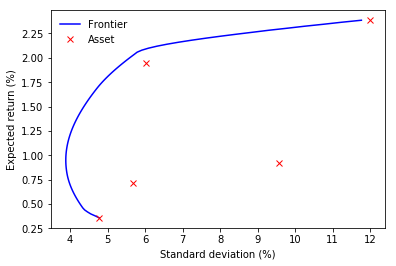

In [6]:
V_Target = np.linspace(Mu.min(), Mu.max(), num=100)
V_Risk = np.zeros(V_Target.shape)
for idx, Target_Return.value in enumerate(V_Target):
    Opt_Portfolio.solve()
    V_Risk[idx] = np.sqrt(Risk_Variance.value)
fig1 = plt.figure(num=1, facecolor='w')
plt.plot(V_Risk, V_Target, 'b-')
plt.plot(np.sqrt(np.diagonal(Sigma)), Mu, 'rx')
plt.legend(['Frontier', 'Asset'], loc='best', frameon=False)
plt.xlabel('Standard deviation (%)')
plt.ylabel('Expected return (%)')
plt.show()